In [1]:
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import preprocessing
import scipy as sp
from scipy import spatial
import numpy as np
from sklearn import cluster
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

# data from this paper: color magnitude diagrams of NGC 2808: https://arxiv.org/pdf/1906.04983.pdf


cmag = pd.read_csv("Default Dataset.csv", header=None)

In [2]:
cmag = pd.read_csv('colormag.csv', header=None)

In [4]:
cmag.head()

,0,1
0,-0.286449,19.920797
1,-0.273440,20.197264
2,-0.270112,19.915151
3,-0.243489,20.285819
4,-0.213538,19.689023


/Users/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


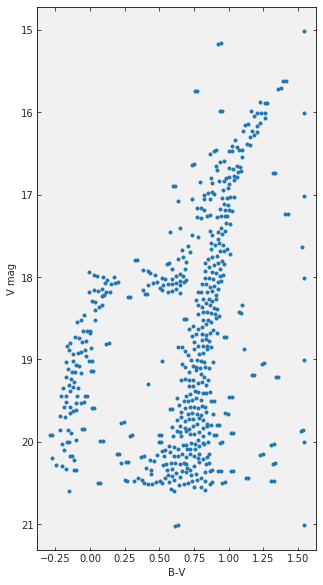

In [3]:
pl.figure(figsize=(5,10))

pl.plot(cmag.iloc[:,0], cmag.iloc[:,1], '.')
pl.xlabel("B-V")
pl.ylabel("V mag")
pl.gca().invert_yaxis()

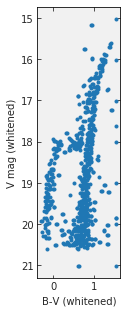

In [6]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
ax.set_aspect('equal')

X = cmag.values
ax.plot(X[:,0], X[:,1], '.')
pl.xlabel("B-V (whitened)")
pl.ylabel("V mag (whitened)")
pl.gca().invert_yaxis()

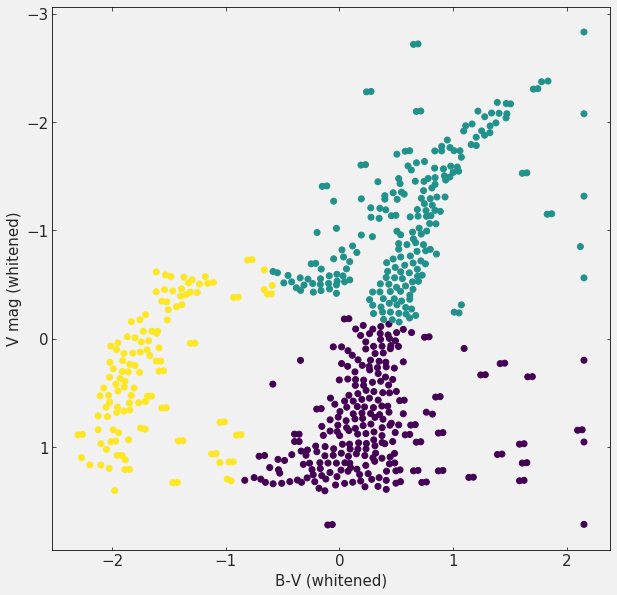

In [38]:
pl.figure(figsize=(10,10))

pl.scatter(X[:,0], X[:,1],  c=(km[1]/2))
pl.xlabel("B-V (whitened)")
pl.ylabel("V mag (whitened)")
pl.gca().invert_yaxis()

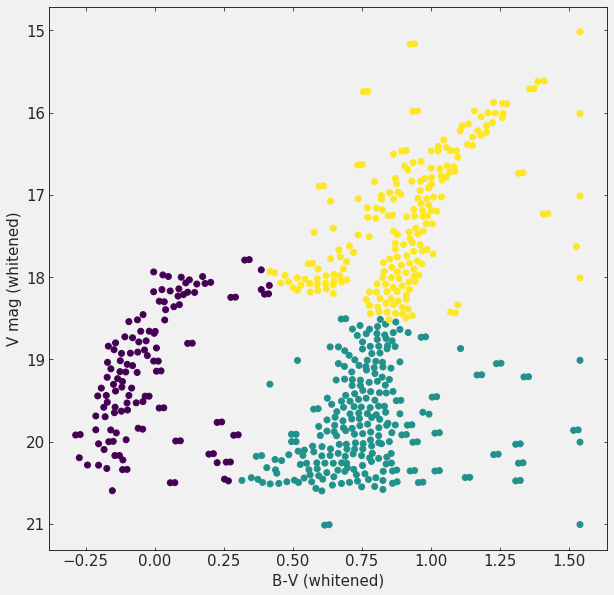

In [40]:
pl.figure(figsize=(10,10))

pl.scatter(cmag.iloc[:,0], cmag.iloc[:,1],  c=(km[1]/2))
pl.xlabel("B-V (whitened)")
pl.ylabel("V mag (whitened)")
pl.gca().invert_yaxis()

1186.8400281153008
924.5299321793068
924.4488184822628
894.4378667945181
887.8640814156563
886.6112406317975
879.717562874966
866.1798112510899


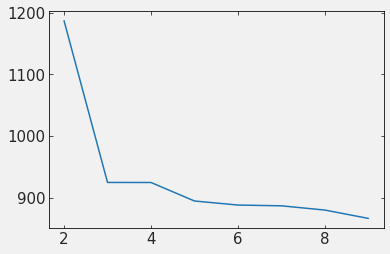

In [41]:
def calICVar(X, labels):
    icvar = 0
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    print(icvar)
    return icvar
tv = []
for i in range(2, 10):
    km = skl.cluster.k_means(X, i)
    tv.append(calICVar(X, km[1]))
    
pl.plot(range(2,10), tv)

2
1187.0300153593626


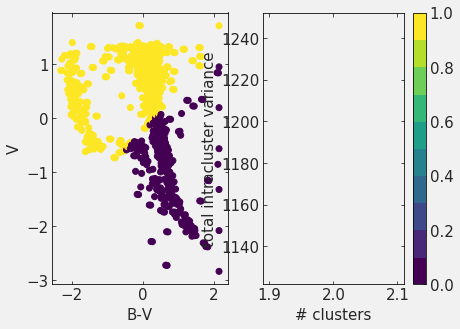

3
924.5299321793068


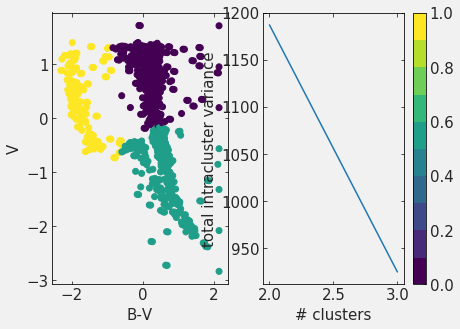

4
924.4488184822628


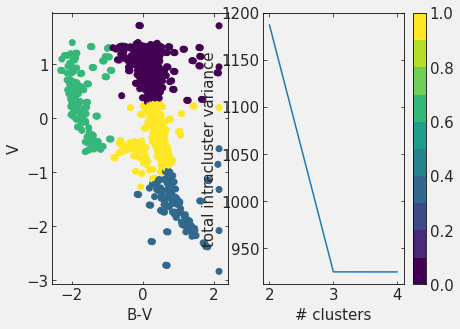

5
896.6208854455053


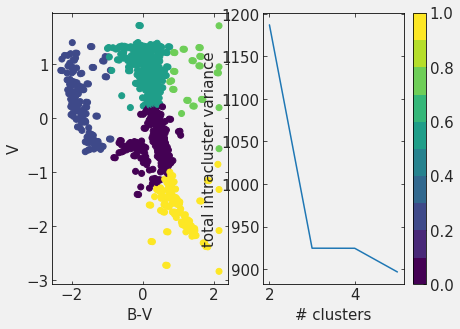

6
887.6377369127628


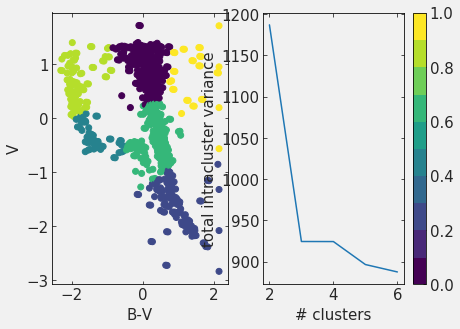

7
888.7491272450116


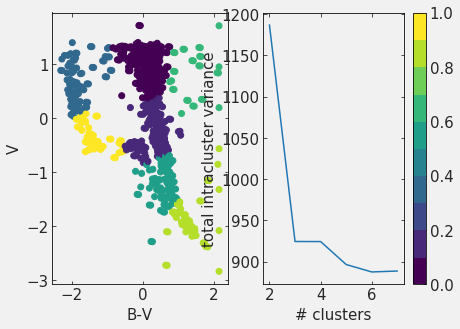

8
879.0340383248343


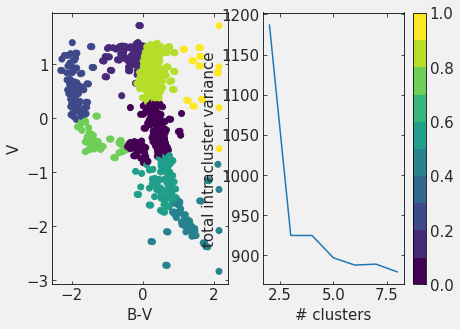

9
866.1798112510899


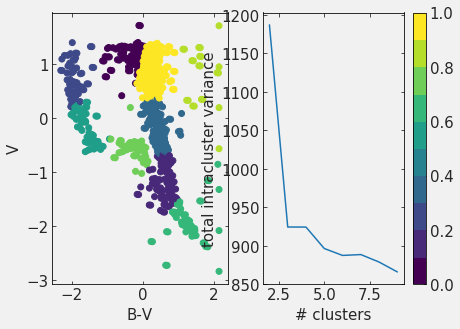

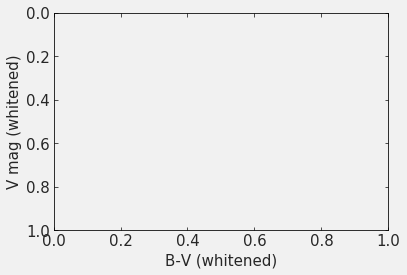

In [43]:
# what does the distribution of distances to the closest object look like ?
# this might help chose the hyperparameter cmin
dm = sp.spatial.distance.squareform(sp.spatial.distance.pdist(X))
dm[dm == 0] = dm.max()

/Users/fbb/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


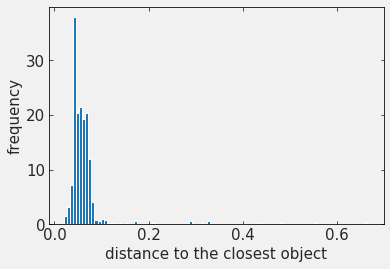

In [44]:
pl.hist(dm.min(0), bins=100, normed=True);
pl.ylabel("frequency")
pl.xlabel("distance to the closest object");

In [45]:
dbs = skl.cluster.DBSCAN(eps=0.2, min_samples=8)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=8, n_jobs=None, p=None)

In [46]:
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_, n_noise_, len(labels)

(3, 83, 601)

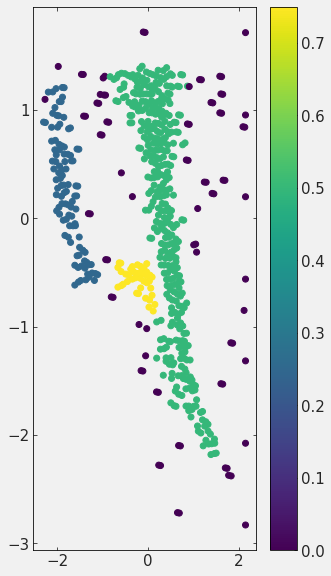

In [47]:
pl.figure(figsize=(5,10))

pl.scatter(X[:,0], X[:,1],  c=(labels + 1) /4)
pl.colorbar()